In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(f'large.csv', sep=',')

In [94]:
labels = pd.read_csv(f'jeopardy.csv', sep=',')

In [92]:
len(np.where(labels == 1)[0])

17141

In [16]:
all_features = list(df.columns)
all_features.pop(0)
print(all_features)

['category', 'turnover', 'transaction_count', 'io_ratio', 'age', 'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max', 'n_of_accounts', 'distinct_counterparties', 'channel_risk', 'atm_withdrawal', 'atm_deposit']


In [5]:
features = np.array([
 'turnover',
 'transaction_count',
 'io_ratio',
 'age',
 'inactive_days_average',
 'inactive_days_max',
 'n_of_accounts',
 'distinct_counterparties',
 'channel_risk',
 'atm_withdrawal',
 'atm_deposit'])

In [13]:
category_list = np.unique(df['category'])
print('category_list', category_list)
nationality_list = np.unique(df['nationality'])
print('nationality_list', nationality_list)
ispep_list = np.unique(df['is_pep'])
print('ispep_list', ispep_list)


category_list [0 1 2]
nationality_list [ 24  32  33  47  82  90 113 123 125 133 138 145 151 166 186 187]
ispep_list [0 1]


category
turnover
8
14
19
23
26
35
43
49
53
61
65
68
76
84
88
93
97
100
106
108
111
112
116
120
121
123
125
129
130
131
134
135
138
140
141
142
144
145
146
149
150
152
153
154
155
157
158
160
162
163
164
165
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
194
transaction_count
202
207
214
222
229
233
240
248
251
258
265
267
270
278
281
287
291
295
298
303
305
306
308
314
316
319
326
327
328
333
334
337
342
344
346
352
356
362
366
367
370
371
375
376
381
382
384
385
388
393
398
400
403
404
406
408
409
411
412
413
414
415
416
419
420
423
424
426
427
429
430
431
433
436
437
440
442
444
445
446
447
448
449
450
451
452
453
454
455
456
456
io_ratio
457
459
460
463
468
473
482
487
488
489
491
495
501
509
510
515
523
525
531
540
541
543
547
554
562
565
569
578
580
581
583
587
591
599
607
610
612
613
619
620
628
636
640
644
645
648
648
654
657
659
662
667
669
670
671
672
673
677
678
679
680
681
684
685
688
692
693
693
697
698
699
7

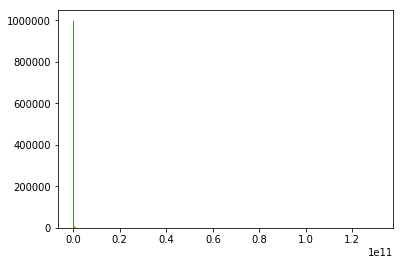

In [87]:
outliers_idx = []
which_col = []
n_bins = 500
for f in all_features:
    print(f)
    bins = plt.hist(df[f].values, bins=n_bins)
    a = bins[0]
    b = bins[1]
    idx_out = np.where((a < 10) & (a > 0))[0]
    if len(idx_out):
        for i in idx_out:
            df_sub = df[(df[f]>b[i]) & (df[f]<b[i+1])].index
            outliers_idx = np.concatenate([outliers_idx, np.array(df_sub)])
            which_col = np.concatenate([which_col, [f]*len(df_sub)])
            print(len(outliers_idx))


In [88]:
outliers_idx = [int(s) for s in outliers_idx]
len(outliers_idx)

1876

In [72]:
df_out = pd.DataFrame(df.values[outliers_idx, :], columns=df.columns)
df_out['which_col'] = which_col

In [75]:
df_out.to_csv('outliers.csv', index = False)

In [77]:
# not_outliers_idx = []
# which_col = []
# n_bins = 100
# for f in all_features:
#     print(f)
#     bins = plt.hist(df[f].values, bins=n_bins)
#     a = bins[0]
#     b = bins[1]
#     idx_out = np.where((a < 10) & (a > 0))[0]
#     if len(idx_out):
#         for i in idx_out:
#             df_sub = df[(df[f]>b[i]) & (df[f]<b[i+1])].index
#             not_outliers_idx = np.concatenate([not_outliers_idx, np.array(df_sub)])
#             print(len(not_outliers_idx))

len(outliers_idx)

419

In [80]:
n = len(df)

In [83]:
idx1 = pd.Index(list(range(n)))
idx2 = pd.Index(outliers_idx)
non_outliers = list(idx1.difference(idx2))

In [84]:
df_out = pd.DataFrame(df.values[non_outliers, :], columns=df.columns)
df_out.to_csv('not_outliers.csv', index = False)

In [95]:

df_out_labels = pd.DataFrame(labels.values[non_outliers, :], columns=labels.columns)
df_out_labels.to_csv('labels.csv', index = False)

In [96]:
len(df_out_labels)

999626